In [2]:
# %% [markdown]
# # 📊 Análise Exploratória de Dados - Restaurantes Fast-Food
# ## Dataset: Google Places - Goiânia e Região
#
# Este notebook realiza uma análise completa dos restaurantes fast-food incluindo:
# - Estatísticas descritivas
# - Análise de variáveis categóricas
# - Detecção de outliers (método IQR)
# - Visualizações com Matplotlib e Seaborn

# %% [markdown]
# ## 1. Importação de Bibliotecas

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Bibliotecas importadas com sucesso!")



✅ Bibliotecas importadas com sucesso!


In [3]:
# %% [markdown]
# ## 2. Carregamento dos Dados
#
# ### 📂 Carregando arquivo do ambiente Colab
# **Pré-requisito:** O arquivo `dataset_fastfood.json` deve estar no diretório do Colab

# %%
# Carregar o arquivo JSON diretamente do ambiente
try:
    with open('dataset_fastfood.json', 'r', encoding='utf-8') as f:
        data = json.load(f)

    df = pd.DataFrame(data)

    print(f"✅ Dataset carregado com sucesso!")
    print(f"🔹 Shape: {df.shape[0]} linhas x {df.shape[1]} colunas")
    print(f"🔹 Colunas: {list(df.columns)}")

except FileNotFoundError:
    print("❌ ERRO: Arquivo 'dataset_fastfood.json' não encontrado!")
    print("\n💡 Soluções possíveis:")
    print("   1. Verifique se o arquivo está no mesmo diretório do notebook")
    print("   2. Faça upload do arquivo para o Colab")
    print("   3. Use o Google Drive para armazenar o arquivo")
    print("\n📁 Arquivos disponíveis no diretório atual:")
    !ls -lh

except json.JSONDecodeError as e:
    print(f"❌ ERRO: Arquivo JSON inválido!")
    print(f"   Detalhes: {e}")

except Exception as e:
    print(f"❌ ERRO inesperado ao carregar arquivo: {e}")



✅ Dataset carregado com sucesso!
🔹 Shape: 40 linhas x 11 colunas
🔹 Colunas: ['title', 'totalScore', 'reviewsCount', 'street', 'city', 'state', 'countryCode', 'website', 'categoryName', 'url', 'phone']


🔹 Informações básicas do dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         40 non-null     object 
 1   totalScore    39 non-null     float64
 2   reviewsCount  40 non-null     int64  
 3   street        39 non-null     object 
 4   city          40 non-null     object 
 5   state         40 non-null     object 
 6   countryCode   40 non-null     object 
 7   website       28 non-null     object 
 8   categoryName  40 non-null     object 
 9   url           40 non-null     object 
 10  phone         30 non-null     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.6+ KB

🔹 Primeiras 5 linhas:
🔹 Últimas 5 linhas:
🔹 Valores nulos por coluna:
📈 Estatísticas descritivas das variáveis numéricas:

📊 Informações adicionais:

• Mediana de totalScore: 4.20
• Mediana de reviewsCount: 618.0
• Desvio padrão de totalSco

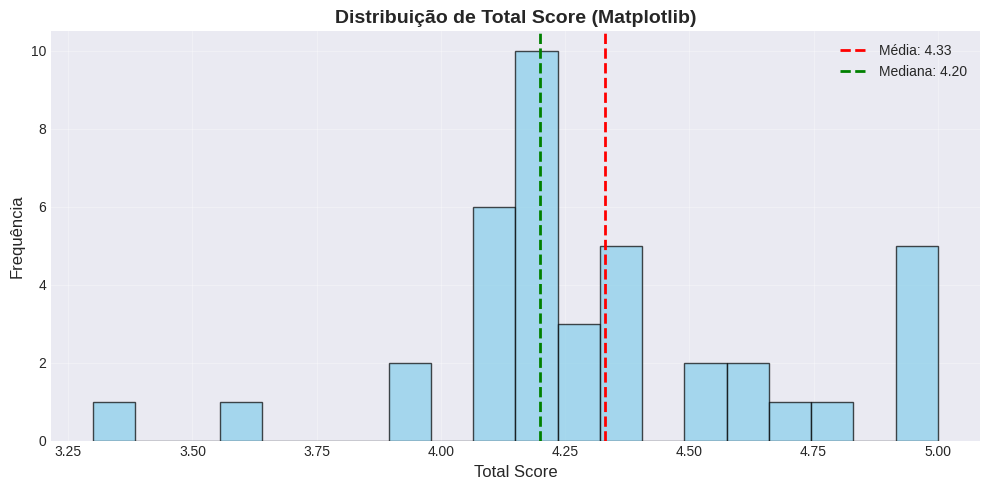

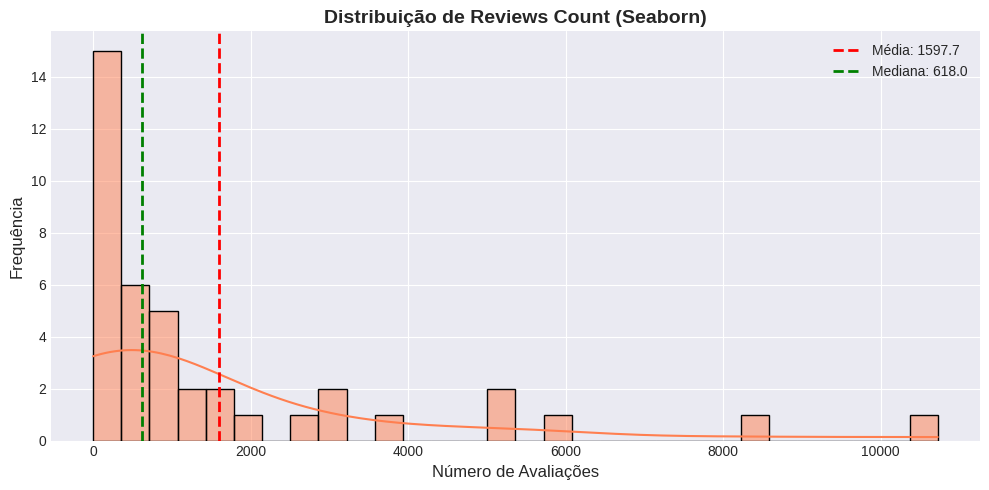

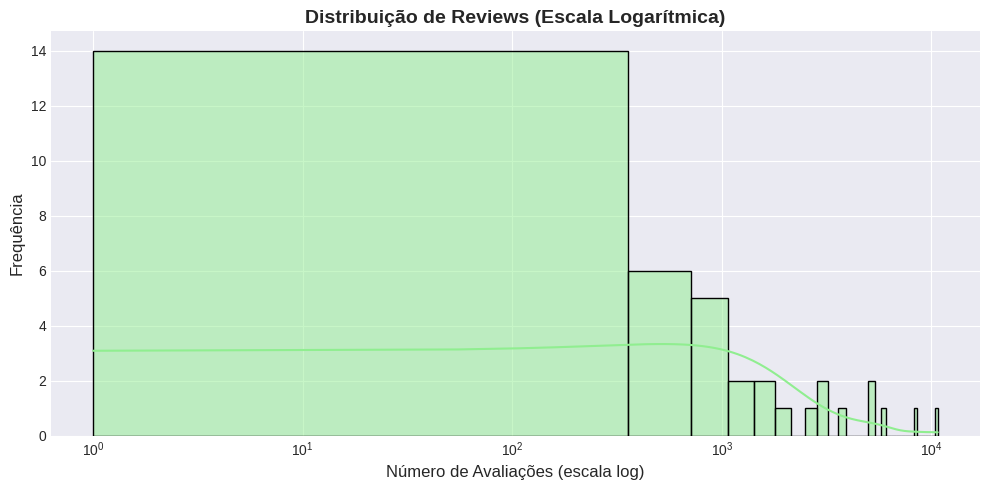

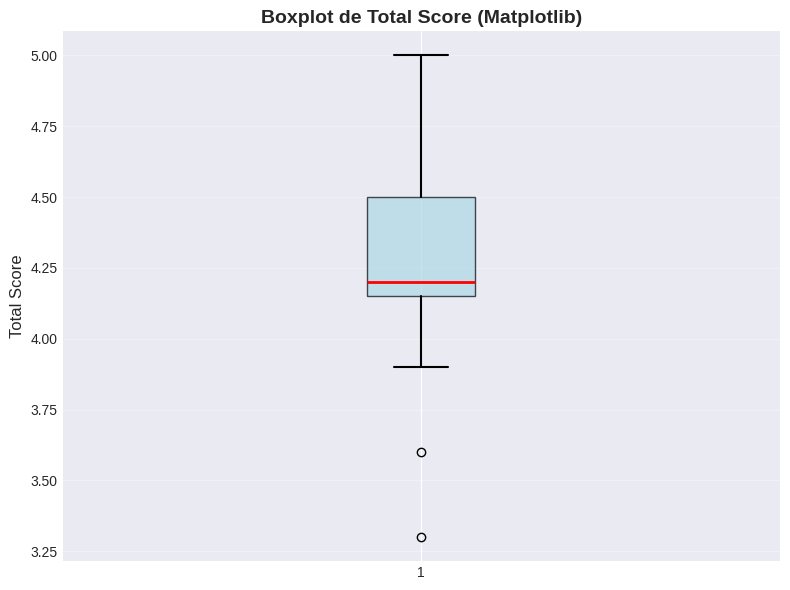

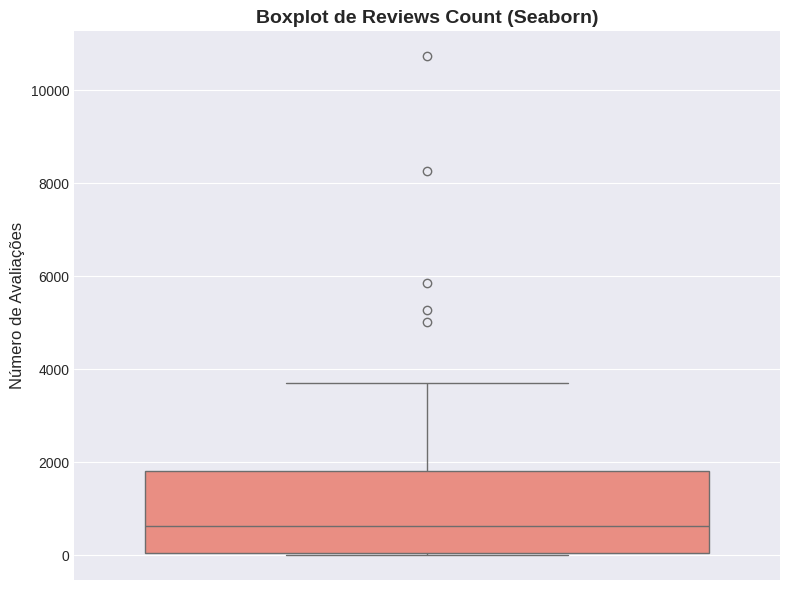

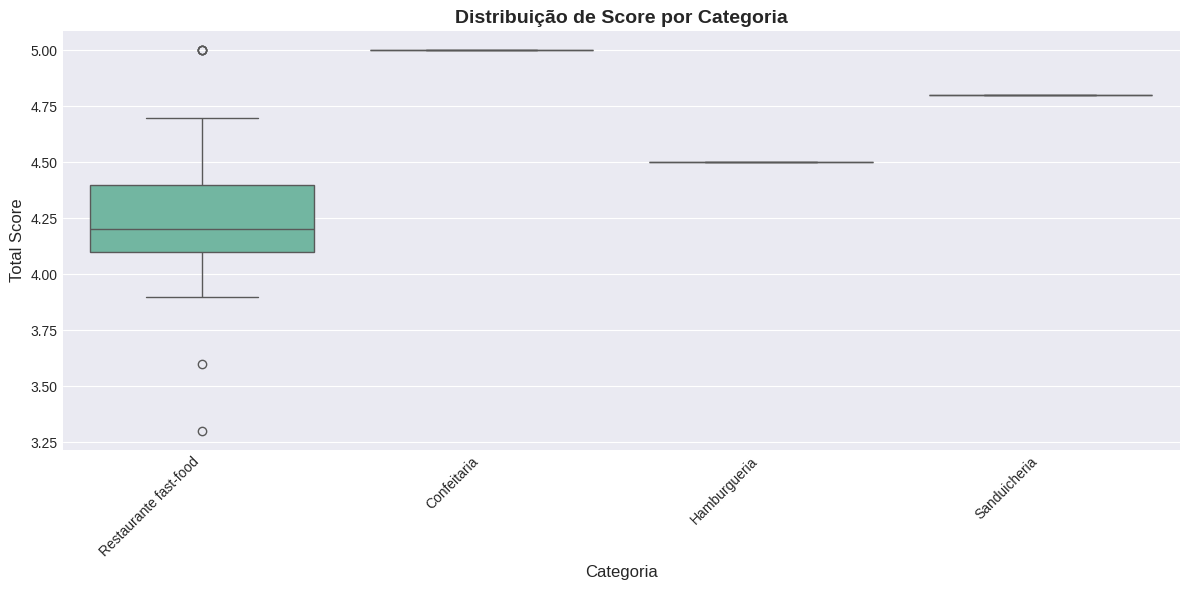

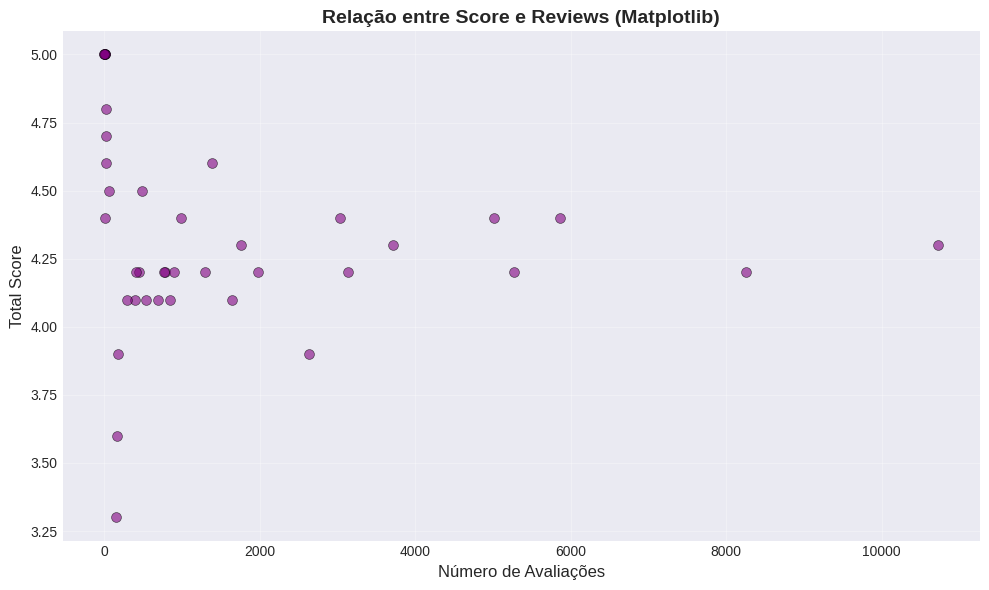

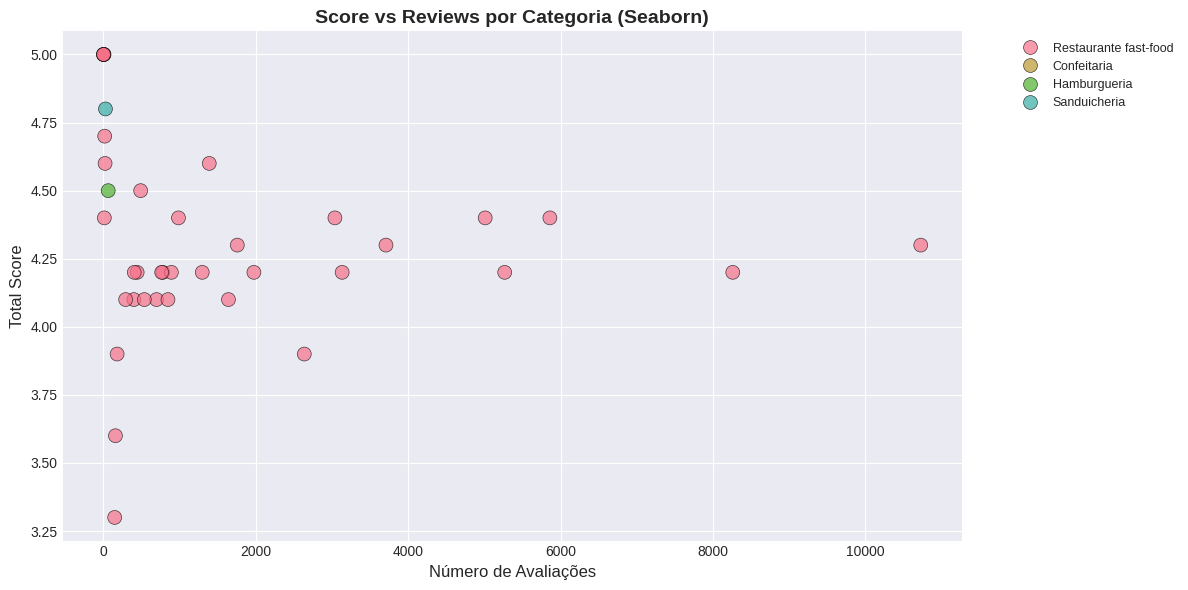

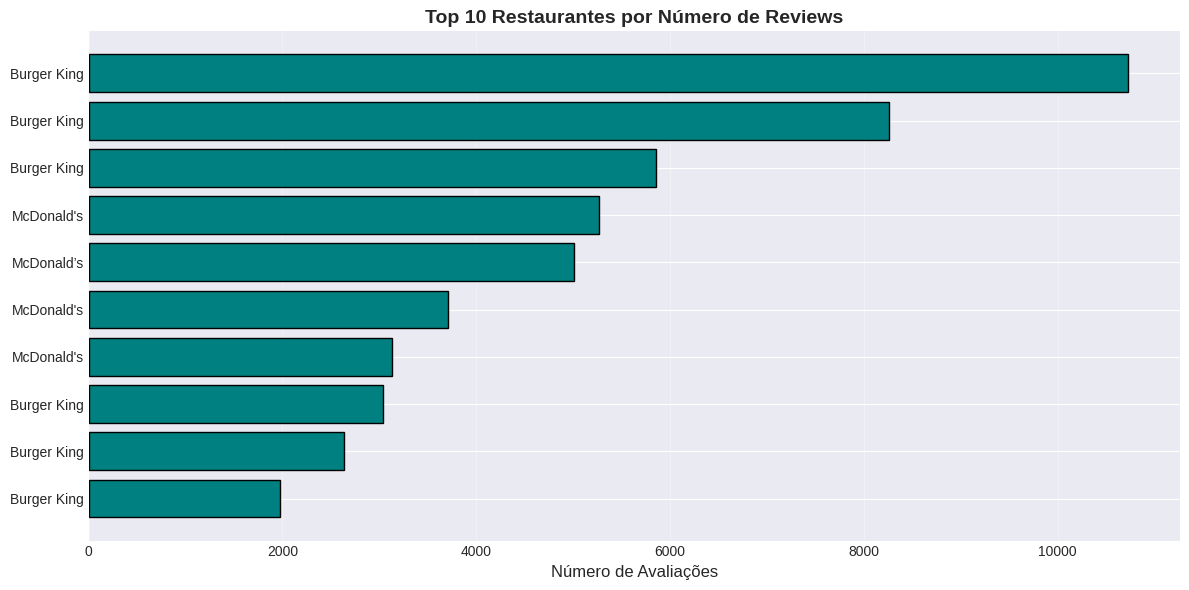

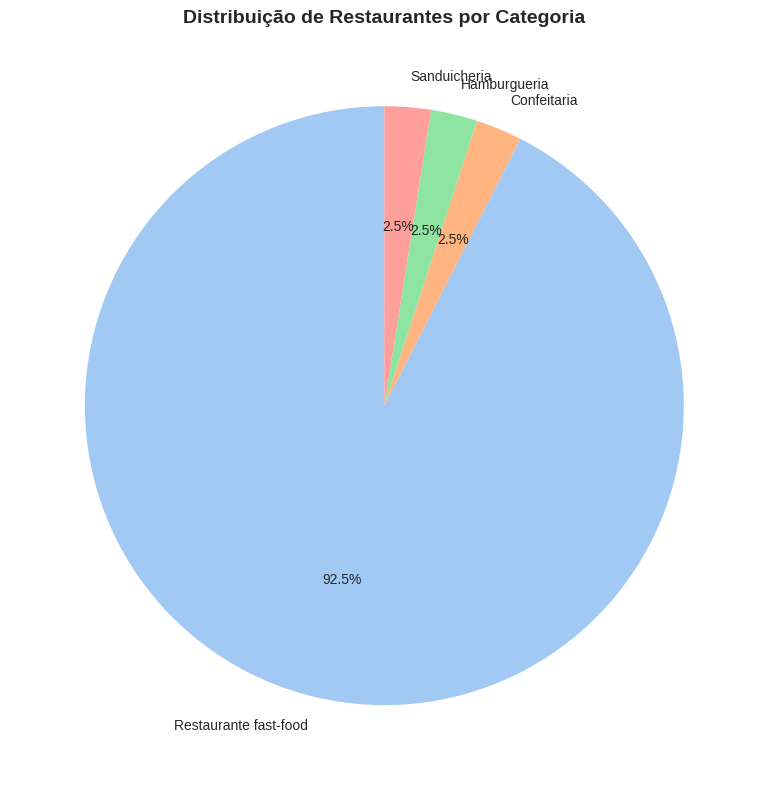

📊 Matriz de Correlação entre Variáveis Numéricas:



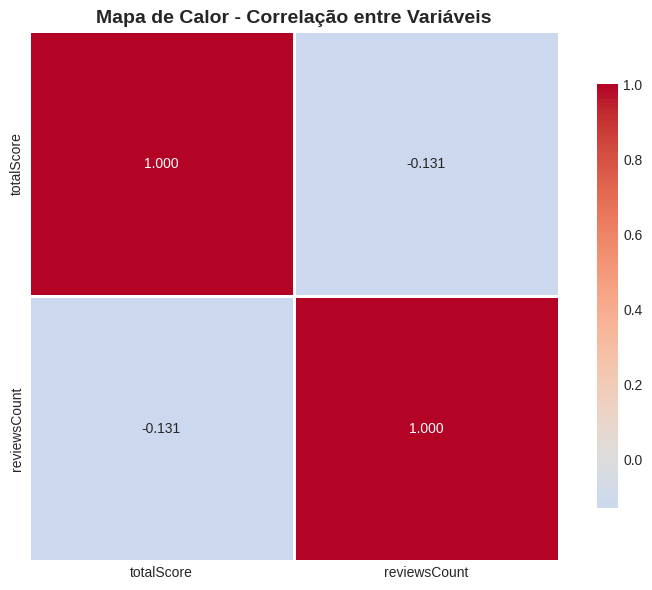

⭐ Distribuição de Restaurantes por Faixa de Score:



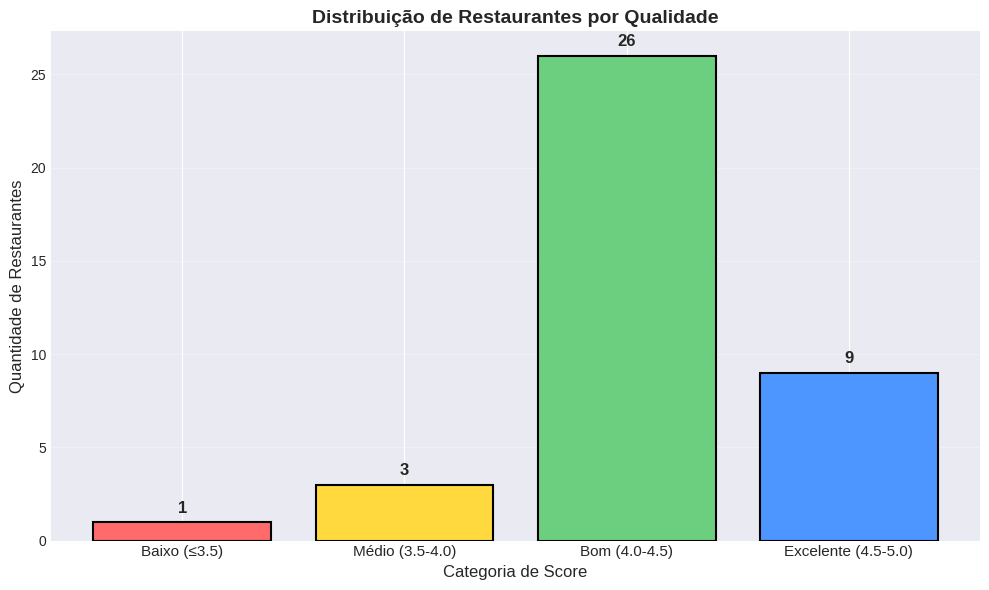

📋 RESUMO DA ANÁLISE EXPLORATÓRIA

📊 Total de restaurantes analisados: 40
⭐ Score médio: 4.33
📝 Média de reviews: 1597.7
🏆 Restaurante mais avaliado: Burger King (10727 reviews)
⭐ Restaurante melhor avaliado: Geladinho goumet (5.0 estrelas)

🏷️ Categorias encontradas: 4
🏙️ Cidades cobertas: 2



In [4]:
# %% [markdown]
# ## 3. Visão Geral do Dataset

# %%
print("🔹 Informações básicas do dataset:\n")
df.info()

# %%
print("\n🔹 Primeiras 5 linhas:")
df.head()

# %%
print("🔹 Últimas 5 linhas:")
df.tail()

# %%
print("🔹 Valores nulos por coluna:")
df.isnull().sum()

# %% [markdown]
# ## 4. Estatísticas Descritivas - Variáveis Numéricas

# %%
numeric_cols = ['totalScore', 'reviewsCount']
print("📈 Estatísticas descritivas das variáveis numéricas:\n")
df[numeric_cols].describe()

# %%
print("📊 Informações adicionais:\n")
print(f"• Mediana de totalScore: {df['totalScore'].median():.2f}")
print(f"• Mediana de reviewsCount: {df['reviewsCount'].median():.1f}")
print(f"• Desvio padrão de totalScore: {df['totalScore'].std():.2f}")
print(f"• Desvio padrão de reviewsCount: {df['reviewsCount'].std():.1f}")

if len(df['totalScore'].mode()) > 0:
    print(f"• Moda de totalScore: {df['totalScore'].mode().values[0]:.1f}")

# %% [markdown]
# ## 5. Análise de Variáveis Categóricas

# %%
print("🏷️ Distribuição por CATEGORIA:\n")
df['categoryName'].value_counts()

# %%
print("🏙️ Distribuição por CIDADE:\n")
df['city'].value_counts()

# %%
print("📍 Distribuição por ESTADO:\n")
df['state'].value_counts()

# %%
print("📊 Análise de completude dos dados:\n")
print(f"🌐 Restaurantes com website: {df['website'].notna().sum()} ({df['website'].notna().sum()/len(df)*100:.1f}%)")
print(f"📞 Restaurantes com telefone: {df['phone'].notna().sum()} ({df['phone'].notna().sum()/len(df)*100:.1f}%)")
print(f"📍 Restaurantes com endereço: {df['street'].notna().sum()} ({df['street'].notna().sum()/len(df)*100:.1f}%)")

# %% [markdown]
# ## 6. Detecção de Outliers - Método IQR

# %%
def detect_outliers_iqr(df, column):
    """
    Detecta outliers usando o método IQR (Interquartile Range)

    Parâmetros:
    - df: DataFrame
    - column: nome da coluna a analisar

    Retorna:
    - outliers: DataFrame com os outliers
    - lower_bound: limite inferior
    - upper_bound: limite superior
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers, lower_bound, upper_bound

print("✅ Função de detecção de outliers definida!")

# %%
print("📊 OUTLIERS em 'totalScore':\n")
outliers_score, lb_score, ub_score = detect_outliers_iqr(df, 'totalScore')
print(f"• Limite inferior: {lb_score:.2f}")
print(f"• Limite superior: {ub_score:.2f}")
print(f"• Quantidade de outliers: {len(outliers_score)}")

if len(outliers_score) > 0:
    print("\n⚠️ Restaurantes com scores outliers:")
    outliers_score[['title', 'totalScore', 'reviewsCount']].sort_values('totalScore')

# %%
print("📊 OUTLIERS em 'reviewsCount':\n")
outliers_reviews, lb_reviews, ub_reviews = detect_outliers_iqr(df, 'reviewsCount')
print(f"• Limite inferior: {lb_reviews:.1f}")
print(f"• Limite superior: {ub_reviews:.1f}")
print(f"• Quantidade de outliers: {len(outliers_reviews)}")

if len(outliers_reviews) > 0:
    print("\n⚠️ Top 10 restaurantes com mais reviews (outliers):")
    outliers_reviews.nlargest(10, 'reviewsCount')[['title', 'totalScore', 'reviewsCount']]

# %% [markdown]
# ## 7. Visualizações - Histogramas

# %%
# Histograma 1: totalScore com Matplotlib
plt.figure(figsize=(10, 5))
plt.hist(df['totalScore'].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Total Score', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Distribuição de Total Score (Matplotlib)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axvline(df['totalScore'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {df["totalScore"].mean():.2f}')
plt.axvline(df['totalScore'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df["totalScore"].median():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# %%
# Histograma 2: reviewsCount com Seaborn
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='reviewsCount', bins=30, kde=True, color='coral')
plt.xlabel('Número de Avaliações', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Distribuição de Reviews Count (Seaborn)', fontsize=14, fontweight='bold')
plt.axvline(df['reviewsCount'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {df["reviewsCount"].mean():.1f}')
plt.axvline(df['reviewsCount'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df["reviewsCount"].median():.1f}')
plt.legend()
plt.tight_layout()
plt.show()

# %%
# Histograma 3: reviewsCount em escala logarítmica
plt.figure(figsize=(10, 5))
sns.histplot(data=df[df['reviewsCount'] > 0], x='reviewsCount', bins=30, kde=True, color='lightgreen')
plt.xscale('log')
plt.xlabel('Número de Avaliações (escala log)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Distribuição de Reviews (Escala Logarítmica)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 8. Visualizações - Boxplots

# %%
# Boxplot 1: totalScore com Matplotlib
plt.figure(figsize=(8, 6))
box = plt.boxplot(df['totalScore'].dropna(), vert=True, patch_artist=True,
                  boxprops=dict(facecolor='lightblue', alpha=0.7),
                  medianprops=dict(color='red', linewidth=2),
                  whiskerprops=dict(linewidth=1.5),
                  capprops=dict(linewidth=1.5))
plt.ylabel('Total Score', fontsize=12)
plt.title('Boxplot de Total Score (Matplotlib)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# %%
# Boxplot 2: reviewsCount com Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['reviewsCount'], color='salmon')
plt.ylabel('Número de Avaliações', fontsize=12)
plt.title('Boxplot de Reviews Count (Seaborn)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# %%
# Boxplot 3: totalScore por categoria
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='categoryName', y='totalScore', palette='Set2')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Total Score', fontsize=12)
plt.title('Distribuição de Score por Categoria', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 9. Visualizações - Scatterplots

# %%
# Scatterplot 1: totalScore vs reviewsCount com Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df['reviewsCount'], df['totalScore'], alpha=0.6, c='purple', s=50, edgecolors='black', linewidth=0.5)
plt.xlabel('Número de Avaliações', fontsize=12)
plt.ylabel('Total Score', fontsize=12)
plt.title('Relação entre Score e Reviews (Matplotlib)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %%
# Scatterplot 2: totalScore vs reviewsCount por categoria com Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='reviewsCount', y='totalScore', hue='categoryName',
                s=100, alpha=0.7, edgecolor='black', linewidth=0.5)
plt.xlabel('Número de Avaliações', fontsize=12)
plt.ylabel('Total Score', fontsize=12)
plt.title('Score vs Reviews por Categoria (Seaborn)', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 10. Visualizações Adicionais

# %%
# Bar plot: Top 10 restaurantes por reviews
plt.figure(figsize=(12, 6))
top10 = df.nlargest(10, 'reviewsCount')[['title', 'reviewsCount']].sort_values('reviewsCount')
plt.barh(range(len(top10)), top10['reviewsCount'].values, color='teal', edgecolor='black')
plt.yticks(range(len(top10)), top10['title'].values, fontsize=10)
plt.xlabel('Número de Avaliações', fontsize=12)
plt.title('Top 10 Restaurantes por Número de Reviews', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# %%
# Gráfico de pizza: Distribuição por categoria
plt.figure(figsize=(10, 8))
category_counts = df['categoryName'].value_counts()
colors = sns.color_palette('pastel')[0:len(category_counts)]
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize': 10})
plt.title('Distribuição de Restaurantes por Categoria', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 11. Análise de Correlação

# %%
# Matriz de correlação
print("📊 Matriz de Correlação entre Variáveis Numéricas:\n")
correlation = df[numeric_cols].corr()
correlation

# %%
# Heatmap de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.3f')
plt.title('Mapa de Calor - Correlação entre Variáveis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 12. Insights e Conclusões

# %%
# Categorização por score
df['score_category'] = pd.cut(df['totalScore'],
                               bins=[0, 3.5, 4.0, 4.5, 5.0],
                               labels=['Baixo (≤3.5)', 'Médio (3.5-4.0)', 'Bom (4.0-4.5)', 'Excelente (4.5-5.0)'])

print("⭐ Distribuição de Restaurantes por Faixa de Score:\n")
df['score_category'].value_counts().sort_index()

# %%
# Visualização da categorização
plt.figure(figsize=(10, 6))
score_counts = df['score_category'].value_counts().sort_index()
colors_bar = ['#ff6b6b', '#ffd93d', '#6bcf7f', '#4d96ff']
plt.bar(range(len(score_counts)), score_counts.values, color=colors_bar, edgecolor='black', linewidth=1.5)
plt.xticks(range(len(score_counts)), score_counts.index, fontsize=11)
plt.ylabel('Quantidade de Restaurantes', fontsize=12)
plt.xlabel('Categoria de Score', fontsize=12)
plt.title('Distribuição de Restaurantes por Qualidade', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(score_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# %%
# Resumo final
print("="*80)
print("📋 RESUMO DA ANÁLISE EXPLORATÓRIA")
print("="*80)
print(f"\n📊 Total de restaurantes analisados: {len(df)}")
print(f"⭐ Score médio: {df['totalScore'].mean():.2f}")
print(f"📝 Média de reviews: {df['reviewsCount'].mean():.1f}")
print(f"🏆 Restaurante mais avaliado: {df.loc[df['reviewsCount'].idxmax(), 'title']} ({df['reviewsCount'].max()} reviews)")
print(f"⭐ Restaurante melhor avaliado: {df.loc[df['totalScore'].idxmax(), 'title']} ({df['totalScore'].max():.1f} estrelas)")
print(f"\n🏷️ Categorias encontradas: {df['categoryName'].nunique()}")
print(f"🏙️ Cidades cobertas: {df['city'].nunique()}")
print("\n" + "="*80)

# %% [markdown]
# ## 🎯 Conclusões
#
# ### Principais Insights:
#
# 1. **Distribuição de Scores**: A maioria dos restaurantes possui avaliações entre 4.0 e 4.5
# 2. **Outliers em Reviews**: Grandes redes (McDonald's, Burger King) concentram mais avaliações
# 3. **Correlação**: Existe uma correlação fraca entre número de reviews e score
# 4. **Completude dos Dados**: A maioria dos restaurantes possui informações completas
# 5. **Categorias**: Predominância de restaurantes fast-food tradicionais